# Boston House Prices Prediction
- Kaggle 連結: https://www.kaggle.com/vikrishnan/boston-house-prices
    - 供參考用，本次作業使用 scikit-learn 內裝的 dataset

## 繳交規則

1. 請將**當前資料夾**命名為 `FDA_HW3_你的學號`
    - 例如：`FDA_HW3_F12345678`
    - 所有**英文**都必須**大寫**
    - 所有**文字**都必須在 **ASCII** 範圍
2. 請將本檔案命名為 `main.ipynb`
3. 請描述開發所需要的**環境**，包含：
    - **作業系統**與**發行版本**
        - 例如：Windows、Mac、Linux 等
        - 需要填寫系統**名稱**與**版本**
    - **程式執行環境**
        - 例如：jupyter、kaggle kernel、colab 等
        - 如果是 jupyter 請**填寫**版本
        - 如果是雲端計算資源**不需填寫**版本
        - 請**勿**使用**付費**資源，助教薪水**微薄**
    - **python 版本**
        - 例如：3.6.9
        - 填寫**至少**能執行的版本即可
    - **安裝環境**
        - 例如使用 `pip`、`conda` 等
        - 助教會以虛擬環境測試
    - **安裝套件**與**版本**
        - 請使用 `requirements.txt`
        - 助教會以虛擬環境測試
        - 請**不要**附上**多餘**的套件
    - **計算資源**
        - 使用 CPU **數量**
        - GPU 版本
    - **執行**所需花費**時間**
        - 請**不要更改**擁有註解 `請勿更動此區塊程式碼` 的程式碼區塊
4. 請**保留執行結果**讓助教可以直接觀看
    - 請記得使用 **Save**
    - **雲端**計算資源請**儲存**後**下載**檔案
    - 所有程式區塊**必須依序執行**
    - 請**不要**保留**多餘**的程式區塊
5. 請**控制隨機亂數**讓實驗結果可以**重現**
    - 關鍵字：**random seed**
6. 請**不要**上傳**多餘**的檔案
    - 不要上傳**隱藏**檔案，包含 `.git`、`.ipynb_checkpoints` 等
    - 不要上傳**虛擬環境**
7. 請附上**參考連結**
    - 可以參考公開的 kernel
    - 沒附上連結者視同**瓢竊**
    - 使用的**演算法**請附上來源，並大致描述概念
8. 請**壓縮**成 `zip` 並上傳至 [moodle](http://moodle.ncku.edu.tw/)
    - 例如 `FDA_HW3_F12345678.zip`

## 評分標準

如果有參考其他作法卻沒有附上來源，則直接視為瓢竊，得分為 $-\infty$。

### 扣分標準

|規則|沒滿足規則失分|
|-|-|
|資料夾名稱符合繳交規則|-5|
|檔案名稱符合繳交規則|-5|
|填寫環境需求|-0|
|填寫計算資源|-0|
|提供 `requirements.txt`|-5|
|將資料夾壓縮成 `zip`|-5|
|不更改擁有註解 `請勿更動此區塊程式碼` 的程式碼區塊|-5|
|計算並顯示執行時間|-5|
|控制隨機亂數讓實驗結果可以重現|-5|

### 得分標準

|規則|滿足規則得分|
|-|-|
|在需要進行說明的cell以markdown語法進行說明|0|
|TODO #1: 整理資料|+5|
|TODO #2: 請進行統計各個 feature 的缺失值數目|+5|
|TODO #3: 利用 Seaborn 畫箱型圖|+10|
|TODO #4: 利用 Seaborn 進行 Heatmap 作圖|+10|
|TODO #5: 挑選特徵|+10|
|TODO #6: 呈現特徵分佈|+10|
|TODO #7: 切分資料|+10|
|TODO #8: 訓練 Linear Regression 模型|+10|
|TODO #9: 訓練 Random Forest Regressor 模型|+10|
|TODO #10: 參數調整|+10|
|TODO #11: 訓練 其他的 regression 模型|+10|
|(Bonus) TODO #12: 超越助教的分數|+10|

In [115]:
# 請勿更動此區塊程式碼

import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [116]:
# 載入必要套件

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

## 載入資料

In [117]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [118]:
# 觀察資料的 key 值有哪些

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## 資料前處理
### TODO #1: 
- 請將資料以 Pandas 整理成 DataFrame 的型式
- 欄位名稱為 feature_names

In [119]:
df = pd.DataFrame(
    # Please put something here.
    data=dataset['data'],
    columns=dataset['feature_names']
)

In [120]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [121]:
df['MEDV'] = dataset.target
# for i in range(506):
#     df['CRIM'][i] = dataset['data'][i][0]
#     df['ZN'][i] = dataset['data'][i][1]
#     df['INDUS'][i] = dataset['data'][i][2]
#     df['CHAS'][i] = dataset['data'][i][3]
#     df['NOX'][i] = dataset['data'][i][4]
#     df['RM'][i] = dataset['data'][i][5]
#     df['AGE'][i] = dataset['data'][i][6]
#     df['DIS'][i] = dataset['data'][i][7]
#     df['RAD'][i] = dataset['data'][i][8]
#     df['TAX'][i] = dataset['data'][i][9]
#     df['PTRATIO'][i] = dataset['data'][i][10]
#     df['B'][i] = dataset['data'][i][11]
#     df['LSTAT'][i] = dataset['data'][i][12]

In [122]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### TODO #2: 請進行統計各個 feature 的缺失值數目

In [123]:
# Please use some functions of Pandas here.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

## 觀察資料的特性

### TODO #3: 利用 Seaborn 畫箱型圖，並進行說明
- 觀察每一個 features 的數值分佈
- 可以用來決定是否要對資料的數值進行標準化

<AxesSubplot:>

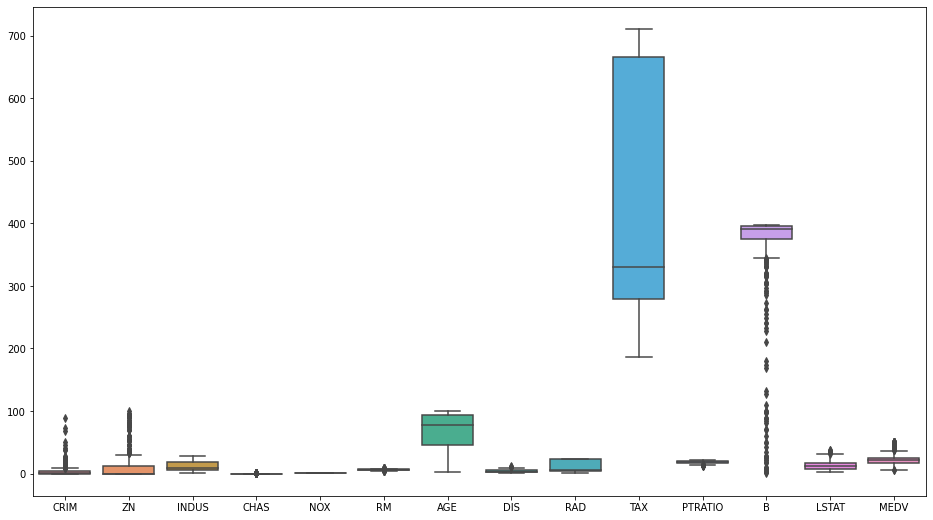

In [125]:
plt.figure(figsize=(16, 9))
# Plot a boxplot with Seaborn
sns.boxplot(data=df)

TAX和B兩個feature的分布狀況與其他feature有較大的差異，這些可能會影響到後續的訓練，可以考慮在後面進行標準化。

### TODO #4: 利用 Seaborn 進行 Heatmap 作圖，並進行說明
- 觀察每一個特徵與房價 (MEDV) 的關聯程度
- 使用 dr.corr() 來計算 feature 和 feature 之間的關係係數
- 數值愈高表示愈正相關，數值愈低表示愈負相關

<AxesSubplot:>

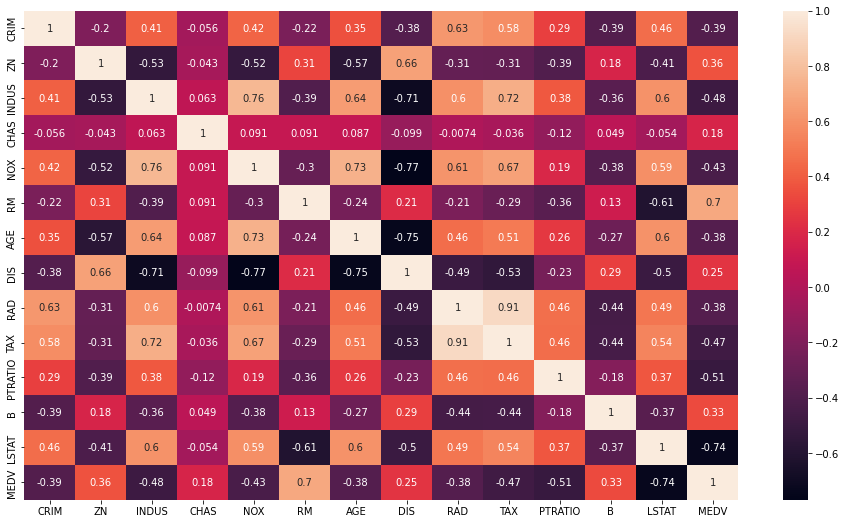

In [126]:
plt.figure(figsize=(16, 9))
# Please use a function of Pandas here.
df.corr()

# Plot a heatmap with Seaborn
sns.heatmap(df.corr(), annot=True)

### TODO #5: 挑選特徵，並進行說明
- 觀察 heatmap 中具有"顯著"正相關或是"顯著"負相關的特徵
- 把這些特徵進行 concatenation，得到新的 dataframe

我所選擇的重要特徵為RM和LSTAT，和MEDV分別有0.7和-0.74的相關度

In [127]:
X = pd.DataFrame(np.c_[df['RM'], df['LSTAT']], # Please put features inside the bracket
                 columns = [df.RM.name, df.LSTAT.name] # Please put feature names here 
                )

### TODO #6: 呈現特徵分佈，並進行說明
- 把你選取到的"重要特徵"進行subplots，畫出散佈圖 (scatter plots)
- 每一張圖的X軸是你選到的特徵、Y軸是房價('MEDV')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

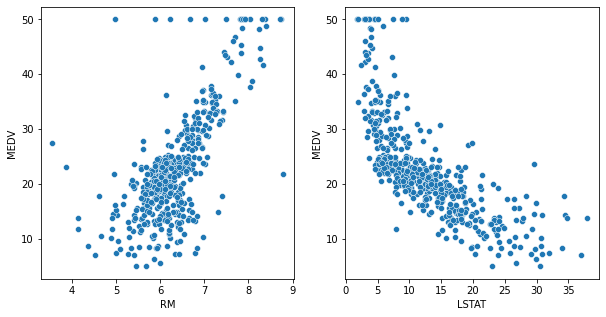

In [128]:
# Please plot subplots here
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],x=X.RM,y=df.MEDV)
sns.scatterplot(ax=axes[1],x=X.LSTAT,y=df.MEDV)





## 訓練模型前的準備
### TODO #7: 切分資料
- 利用 train_test_split，將資料切成 train set 和 test set
- 設定 train set 的比例為全部資料的 80%
- 請記得設定 random_state 以控制隨機過程

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,df.MEDV,test_size=0.2,random_state=0)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(404, 2)
(102, 2)
(404,)
(102,)


## 訓練模型並進行評估

### TODO #8: 訓練 Linear Regression 模型，並說明訓練結果
- 利用 scikit-learn，將資料 fit 在 LinearRegression
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [130]:
# Modeling
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)





Text(0, 0.5, 'Y_true')

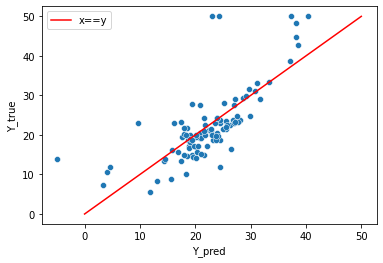

In [131]:
# plotting the y_test vs y_pred

scatter=sns.scatterplot(x=Y_pred,y=Y_test)
sns.lineplot(x=[0,50],y=[0,50],color='red',label='x==y')
scatter.set_xlabel('Y_pred')
scatter.set_ylabel('Y_true')






In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [133]:
print(mean_squared_error(Y_pred,Y_test))
print(r2_score(Y_pred,Y_test))

37.38310563877996
0.2653268314703576


可以看到訓練成果相當糟，畢竟linear regression是相對簡單的模型

### TODO #9: 訓練 Random Forest Regressor 模型
- 利用 scikit-learn，將資料 fit 在 RandomForestRegressor 模型
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
# Modeling
model=RandomForestRegressor(random_state=42)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)





Text(0, 0.5, 'Y_true')

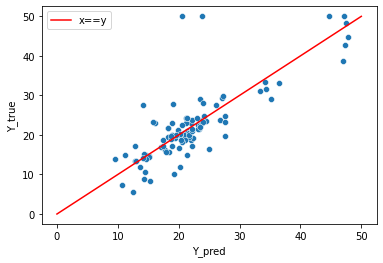

In [136]:
# plotting the y_test vs y_pred

scatter=sns.scatterplot(x=Y_pred,y=Y_test)
sns.lineplot(x=[0,50],y=[0,50],color='red',label='x==y')
scatter.set_xlabel('Y_pred')
scatter.set_ylabel('Y_true')





In [137]:
print(mean_squared_error(Y_pred,Y_test))
print(r2_score(Y_pred,Y_test))

28.794149460784325
0.546465458504553


可以看到random forest的訓練結果進步不少，但仍是差強人意

### TODO #10: 參數調整，並進行說明
- 請嘗試使用 Grid search 來進行調參
    - 可以自己寫 for-loop
    - 或是使用 sklearn.model_selection 中的 GridSearchCV 函式

In [138]:
from sklearn.model_selection import GridSearchCV

In [141]:
parameters={'n_estimators':[100,150,200,250,300],'max_depth':[3,5,7],}
model=RandomForestRegressor(random_state=42)
clf=GridSearchCV(model,param_grid=parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200, 250, 300]})

Text(0, 0.5, 'Y_true')

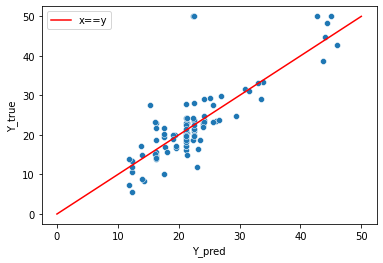

In [142]:
Y_pred=clf.predict(X_test)
scatter=sns.scatterplot(x=Y_pred,y=Y_test)
sns.lineplot(x=[0,50],y=[0,50],color='red',label='x==y')
scatter.set_xlabel('Y_pred')
scatter.set_ylabel('Y_true')

In [143]:
print(mean_squared_error(Y_pred,Y_test))
print(r2_score(Y_pred,Y_test))

27.524575030526556
0.4646695775022046


用random forest並進行Grid search之參數調整後，相比原本的MSE雖略降低，但R2卻也降低不少，或許使用默認的參數就可以有比較好的效果。

### TODO #11: 訓練 其他的 regression 模型，與上述兩種模型比較並說明訓練結果
- 將資料 fit 在其他的迴歸模型，可選擇 SVR、XGBRegressor 或其他...
- 利用 TODO #10 的工具來進行參數調整
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

我使用XGBRegressor，可以看出訓練結果好非常多，當然標準化和考量的feature有很大影響，我將在最後面說明。

In [144]:
!pip install xgboost

In [145]:
import xgboost as xgb

In [146]:
from sklearn.preprocessing import MinMaxScaler
y=df.MEDV
X=df.drop('MEDV',axis=1)
X=df.drop('DIS' ,axis=1)
X=df.drop('CHAS',axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(X,y,test_size=0.2,random_state=42)
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)


# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [147]:
parameters={'n_estimators':[100,150,200,250,300],'max_depth':[4, 6, 8],}
model = xgb.XGBRegressor(verbosity=0) 
clf=GridSearchCV(model,param_grid=parameters,cv=5)

clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)



Text(0, 0.5, 'Y_true')

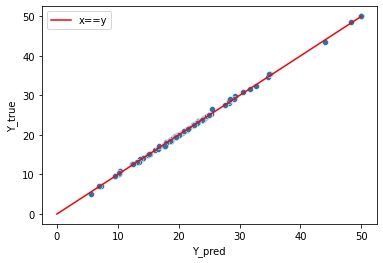

In [148]:
scatter=sns.scatterplot(x=Y_pred,y=Y_test)
sns.lineplot(x=[0,50],y=[0,50],color='red',label='x==y')
scatter.set_xlabel('Y_pred')
scatter.set_ylabel('Y_true')

In [149]:
print(mean_squared_error(Y_pred,Y_test))
print(r2_score(Y_pred,Y_test))

0.06217167450040927
0.99914736683208


### (Bonus) TODO #12: 超越助教的分數，並且說明如何做到
- R2:  0.8831229012211493
- Test loss (MSE):  9.150760226336033

我使用XGBRegressor，事先進行標準化，並將除了CHAS和DIS(相關度較低)的feature都考量進去，最後得到0.999的R2，不確定是否為overfit。
若使用所有feature(不要排除)，則可得0.895的R2

In [150]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 92.43724608421326
